# WeatherPy
----

#### Insights
#### -- Temperatures get colder the farther the studied city is located away from the Equator.
#### -- At the time this study was performed the southern hemisphere was transitioning from summer to fall, which it is shown in the lower slope of the linear equation of the regression comparing to the northern.
#### -- Analysis of humidity and cloudiness did not show a strong relation with latitude at the time this analysis was conducted.
#### -- Wind speeds showed a faster speed as the farther the location from the Equator.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Create list for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

In [4]:
# Create empty lists to add API data into lists. Name of lists provided:
# city name, cloudiness, country, date, humidity, lat, lng, max temperature, and wind speed
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start a call counter for the records
record = 1

# Print a statement to show when starts
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop thru cities in the city list generated above
for city in cities:  
    # Use a try statement to append the calls where the value is found 
    # Use a except for when we do not get a result
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Add 1 to the counter like in VBA
        record= record + 1
        # Use time.sleep for avoiding issues and not over pass my API limits. 
        time.sleep(1.01)
        
    # If it does not find a record skip to next API call
    # Use Alexis statement
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=jamestown
Processing Record 2 | Kalianget
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=kalianget
Processing Record 3 | Uvat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=uvat
Processing Record 4 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=atuona
Processing Record 5 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=busselton
Processing Record 6 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=punta arenas
Processing Record 7 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 57 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=khatanga
Processing Record 58 | Karatuzskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=karatuzskoye
City not found. Skipping...
Processing Record 59 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=albany
Processing Record 60 | Santa Cruz de la Sierra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=santa cruz
Processing Record 61 | Vaitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=vaitape
City not found. Skipping...
Processing Record 62 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=sitka
Processing Record 63 | Pueblo Bello
http://api.openweathermap.org/d

Processing Record 112 | Boffa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=boffa
Processing Record 113 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=cape town
Processing Record 114 | Nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=nyurba
Processing Record 115 | Bac Lieu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=bac lieu
Processing Record 116 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=talnakh
Processing Record 117 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=hobart
City not found. Skipping...
City not found. Skipping...
Processing Record 118 | Kastornoye
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 167 | Minbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=minbu
Processing Record 168 | Beira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=beira
Processing Record 169 | Shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=shimoda
Processing Record 170 | Sakakah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=sakakah
Processing Record 171 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=cherskiy
Processing Record 172 | Santa Helena de Goiás
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=santa helena de goias
Processing Record 173 | Maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fe

Processing Record 223 | Upington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=upington
Processing Record 224 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=dikson
Processing Record 225 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=mount gambier
Processing Record 226 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=cabo san lucas
Processing Record 227 | Lüderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=luderitz
Processing Record 228 | Mount Hagen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=mount hagen
Processing Record 229 | Pershotravneve
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 278 | Kokopo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=kokopo
Processing Record 279 | Nuevo Progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=nuevo progreso
Processing Record 280 | Okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=okhotsk
Processing Record 281 | Hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=hamilton
Processing Record 282 | Harlingen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=harlingen
Processing Record 283 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=richards bay
City not found. Skipping...
Processing Record 284 | Hirara
http://api.openweathermap.org/data/2.5/weather?units=Im

City not found. Skipping...
Processing Record 333 | Miles City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=miles city
City not found. Skipping...
Processing Record 334 | Chotila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=chotila
Processing Record 335 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=port hardy
City not found. Skipping...
Processing Record 336 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=chokurdakh
Processing Record 337 | Nouakchott
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=nouakchott
Processing Record 338 | Black River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=black river
Processing Record 339 | Cu

Processing Record 389 | Iquique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=iquique
City not found. Skipping...
Processing Record 390 | Qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=qasigiannguit
City not found. Skipping...
Processing Record 391 | Yakovlevskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=yakovlevskoye
Processing Record 392 | Vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=vestmanna
Processing Record 393 | Kiryat Gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=gat
Processing Record 394 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=palmer
Processing Record 395 | Bartlesville
http://api.openweatherma

Processing Record 444 | Rivera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=rivera
Processing Record 445 | Ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=ahipara
Processing Record 446 | Kintampo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=kintampo
City not found. Skipping...
Processing Record 447 | Barkhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=barkhan
Processing Record 448 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=narsaq
Processing Record 449 | Nālūt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=nalut
Processing Record 450 | Xique-Xique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050

Processing Record 500 | Kamaishi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=kamaishi
Processing Record 501 | Marsabit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=marsabit
Processing Record 502 | General Roca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=general roca
Processing Record 503 | Mwinilunga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=mwinilunga
Processing Record 504 | Harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=harper
Processing Record 505 | Curuçá
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=curuca
Processing Record 506 | Puerto del Rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a805

Processing Record 556 | Leyva Solano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=gabriel leyva solano
Processing Record 557 | Jennings
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=jennings
City not found. Skipping...
Processing Record 558 | Westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=westport
Processing Record 559 | Palu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=palu
Processing Record 560 | Tūkrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=tukrah
Processing Record 561 | Värnamo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47d8dbcb826a8050fed18314c29dab9c&q=varnamo
Processing Record 562 | Brighton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictonary with the lists generated above and then create a df with it
city_dictionary = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

city_data = pd.DataFrame(city_dictionary)

city_data.to_csv('../output_data/cities.csv')

city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,1,US,1586654195,48,42.10,-79.24,42.01,3.36
1,Kalianget,44,ID,1586654371,76,-7.05,113.93,80.87,3.29
2,Uvat,1,RU,1586654372,90,59.14,68.90,33.80,4.63
3,Atuona,38,PF,1586654271,64,-9.80,-139.03,82.67,5.21
4,Busselton,92,AU,1586654244,59,-33.65,115.33,73.99,9.22
...,...,...,...,...,...,...,...,...,...
564,Natchez,1,US,1586654864,64,31.56,-91.40,69.80,5.82
565,Vestmannaeyjar,100,IS,1586654903,84,63.44,-20.27,43.20,8.34
566,Tocopilla,39,CL,1586655164,50,-22.09,-70.20,67.39,3.47
567,Puro,1,PH,1586655165,58,12.48,123.38,85.48,4.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

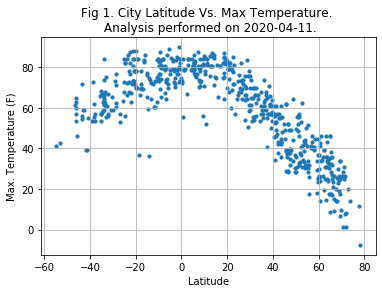

In [6]:
from datetime import date
# Make a scatter plot for latitute and Maximum temoerature
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o", s=10 )
today = date.today()
# Add graph properties
plt.title(f"Fig 1. City Latitude Vs. Max Temperature. \n Analysis performed on {today}.")
# plt.datetime(today)
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/max_temp_vs_latitude.png")

# Show plot
plt.show()

#### Figure 1 shows a plot of Max Temperature vs Latitude of the cities analyzed.  

#### Latitude vs. Humidity Plot

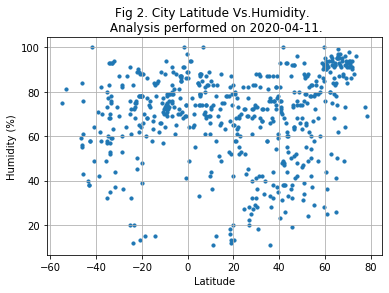

In [7]:
# Make a scatter plot for latitude and humidity
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o", s=10)
today = date.today()
# Add graph properties
plt.title(f"Fig 2. City Latitude Vs.Humidity. \n Analysis performed on {today}.")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/humidity_vs_latitude.png")

# Show plot
plt.show()

#### Figure 2 shows a plot of Humidity vs Latitude of the cities studied. 

#### Latitude vs. Cloudiness Plot

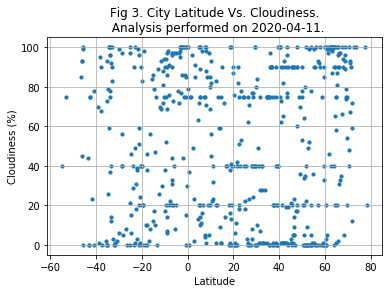

In [8]:
# Make a scatter plot for latitude and cloudiness
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o", s=10)
today = date.today()
# Add graph properties
plt.title(f"Fig 3. City Latitude Vs. Cloudiness.\n  Analysis performed on {today}.")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/cloudiness_vs_latitude.png")

# Show plot
plt.show()

#### Figure 3 shows a plot of Cloudiness vs Latitude of the cities in our analysis. 

#### Latitude vs. Wind Speed Plot

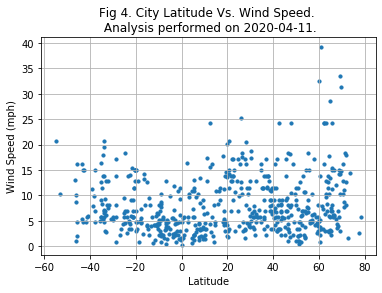

In [9]:
# Make a scatter plot for latitude and wind speed
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o", s=10)
today = date.today()
# Add graph properties
plt.title(f"Fig 4. City Latitude Vs. Wind Speed. \n Analysis performed on {today}.")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/wind_speed_vs_latitude.png")

# Show plot
plt.show()

#### Figure 4 shows a plot between Wind Speed and Latitude of the cities selected. 

## Linear Regression

In [10]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = city_data[city_data['Lat'] >= 0]
south_hemi = city_data[city_data['Lat'] < 0]

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
#(here is what I want to ask for the variables that change everytime I plot)
def linear_regression(x_values, y_values, title, annotate_position, y_label, fig_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, annotate_position, fontsize=15,color="red")
    today = date.today()
   
    plt.title(f'{title}. \n Analyzed on {today}.')
    plt.xlabel('Latitud')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.savefig(f"../output_data/{fig_name}.png")
    plt.show()
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

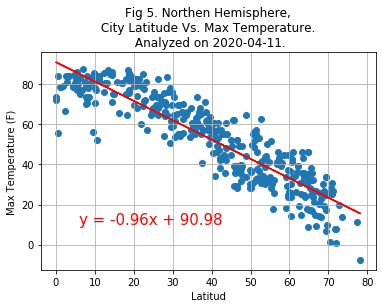

In [12]:
linear_regression(north_hemi['Lat'], north_hemi['Max Temp'], "Fig 5. Northen Hemisphere,\n City Latitude Vs. Max Temperature", \
                (6,10), 'Max Temperature (F)', 'lr_n_max_vs_latitude' )

#### Figure 5 shows a plot between the Max Temperature(F) and the Latitude of cities located in the northen hemisphere . The equation shows a relationship between both variables, indicating that the more you go north the lower temperature it becomes at the time of this study. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

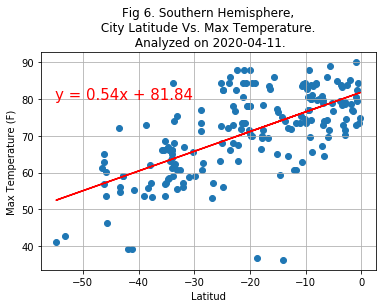

In [13]:
linear_regression(south_hemi['Lat'], south_hemi['Max Temp'], "Fig 6. Southern Hemisphere,\n City Latitude Vs. Max Temperature", \
                (-55,80), 'Max Temperature (F)', 'lr_s_max_vs_latitude' )

#### Figure 6 shows a plot between the Max Temperature(F) and the Latitude of cities located in the southern hemisphere. The equation shows a relationship between both variables, indicating that the more you go south the lower temperature it becomes at the time of this study. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

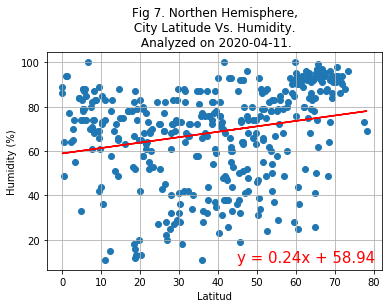

In [14]:
linear_regression(north_hemi['Lat'], north_hemi['Humidity'], "Fig 7. Northen Hemisphere,\n City Latitude Vs. Humidity", \
                (45,10), 'Humidity (%)', 'lr_n_humidity_vs_latitude' )

#### Figure 7 shows a plot between the Humidity (%) and the Latitude of cities located in the northen hemisphere . The equation shows a weak relationship between both variables at the time of this study.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

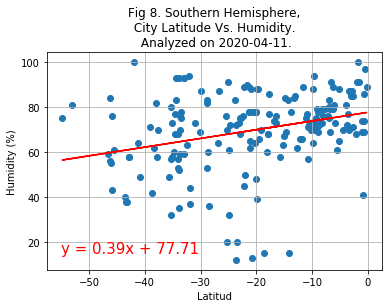

In [15]:
linear_regression(south_hemi['Lat'], south_hemi['Humidity'], "Fig 8. Southern Hemisphere,\n City Latitude Vs. Humidity", \
                (-55,15), 'Humidity (%)', 'lr_s_humidity_vs_latitude' )

#### Figure 8 shows a plot between the Humidity (%) and the Latitude of cities located in the souther hemisphere . The equation shows a weak relationship between both variables at the time of this study.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

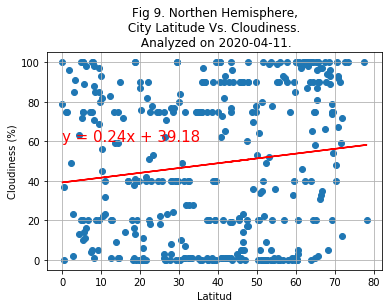

In [16]:
linear_regression(north_hemi['Lat'], north_hemi['Cloudiness'], "Fig 9. Northen Hemisphere,\n City Latitude Vs. Cloudiness", \
                (0,60), 'Cloudiness (%)', 'lr_n_cloudiness_vs_latitude' )

#### Figure 9 shows a plot between the Cloudiness (%) and the Latitude of cities located in the northen hemisphere . The equation shows a weak/non relationship between both variables at the time of this study.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

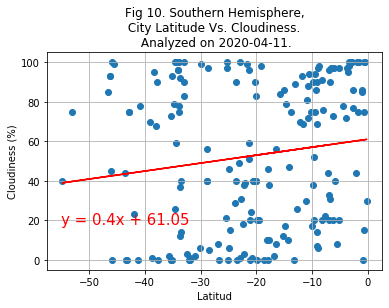

In [17]:
linear_regression(south_hemi['Lat'], south_hemi['Cloudiness'], "Fig 10. Southern Hemisphere,\n City Latitude Vs. Cloudiness", \
                (-55,18), 'Cloudiness (%)', 'lr_s_cloudiness_vs_latitude' )

#### Figure 10 shows a plot between the Cloudiness (%) and the Latitude of cities located in the southern hemisphere . The equation shows a weak relationship between both variables at the time of this study.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

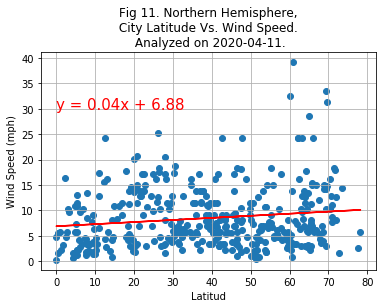

In [18]:
linear_regression(north_hemi['Lat'], north_hemi['Wind Speed'], "Fig 11. Northern Hemisphere,\n City Latitude Vs. Wind Speed", \
                (0,30), 'Wind Speed (mph)', 'lr_n_windspeed_vs_latitude' )

#### Figure 11 shows a plot between the Wind Speed (mph) and the Latitude of cities located in the northern hemisphere . The equation shows a weak relationship between both variables at the time of this study, indicating stronger winds as the latitude goes north.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

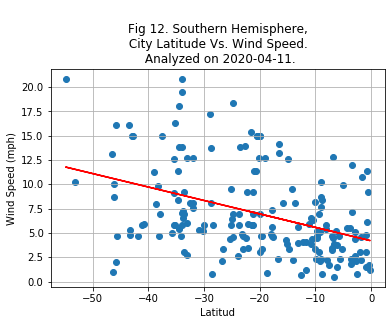

In [19]:
linear_regression(south_hemi['Lat'], south_hemi['Wind Speed'], "Fig 12. Southern Hemisphere,\n City Latitude Vs. Wind Speed", \
                (-40,27), 'Wind Speed (mph)', 'lr_s_windspeed_vs_latitude' )

#### Figure 12 shows a plot between the Wind Speed (mph) and the Latitude of cities located in the southern hemisphere . The equation shows a weak relationship between both variables at the time of this study, indicating stronger winds as the latitude moves away from the Equator.